In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
Smartphones= pd.read_csv("Z://csv//Smartphone.csv")
Smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1
6,iphone 5s,ios,32,1,112.0,Apple,4.0
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [13]:
counts = Smartphones.Ram.value_counts()
counts

2    3
4    3
3    2
1    1
Name: Ram, dtype: int64

In [14]:
category = counts.index
category

Int64Index([2, 4, 3, 1], dtype='int64')

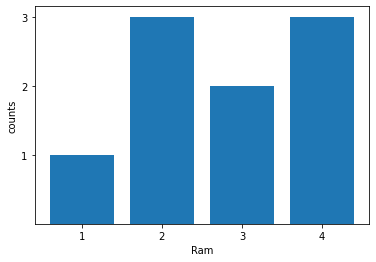

In [17]:
plt.bar(category , counts)
plt.xlabel('Ram')
plt.ylabel('counts')
plt.xticks([1,2,3,4])
plt.yticks([1,2,3])
plt.show()

In [22]:
def ECDF (data) :
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

x,y = ECDF(Smartphones.inch)
x,y

(array([4. , 4.7, 5. , 5. , 5.1, 5.2, 5.5, 5.7, 5.8]),
 array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
        0.66666667, 0.77777778, 0.88888889, 1.        ]))

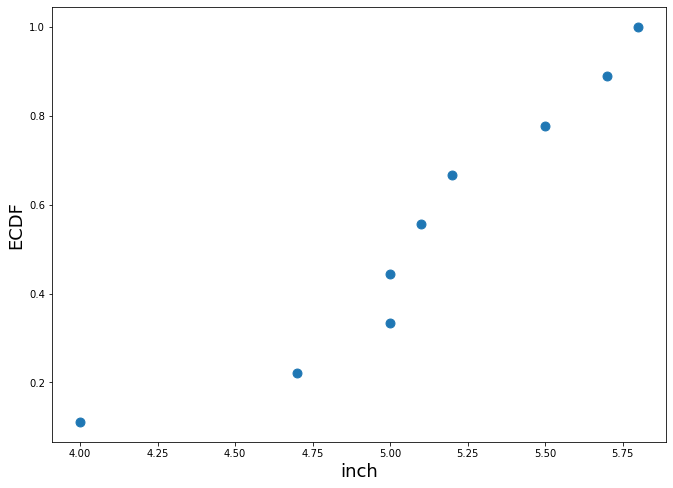

In [28]:
plt.figure(figsize=(11,8))
plt.scatter(x,y,s=80)
plt.margins(0.05)
plt.xlabel("inch" , fontsize=18)
plt.ylabel('ECDF' , fontsize=18)
plt.show()


In [29]:
np.mean(Smartphones.inch)

5.111111111111111

In [30]:
np.median(Smartphones.inch)

5.1

In [31]:
np.percentile(Smartphones.inch , [20,50,75])

array([4.88, 5.1 , 5.5 ])

In [32]:
np.var(Smartphones.inch)

0.2676543209876543

In [33]:
np.std(Smartphones.inch)

0.5173531878587918

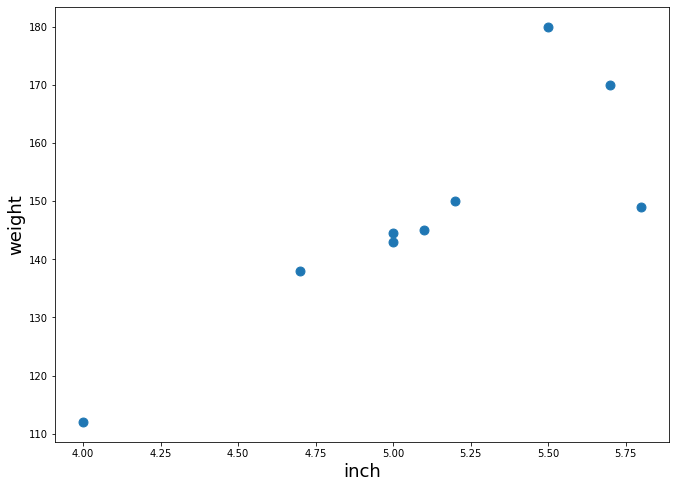

In [35]:
plt.figure(figsize=(11,8))
plt.scatter(Smartphones.inch,Smartphones.Weight,s=80)
plt.margins(0.05)
plt.xlabel("inch" , fontsize=18)
plt.ylabel('weight' , fontsize=18)
plt.show()


In [36]:
np.cov(Smartphones.inch , Smartphones.Weight)

array([[3.01111111e-01, 8.91944444e+00],
       [8.91944444e+00, 3.69402778e+02]])

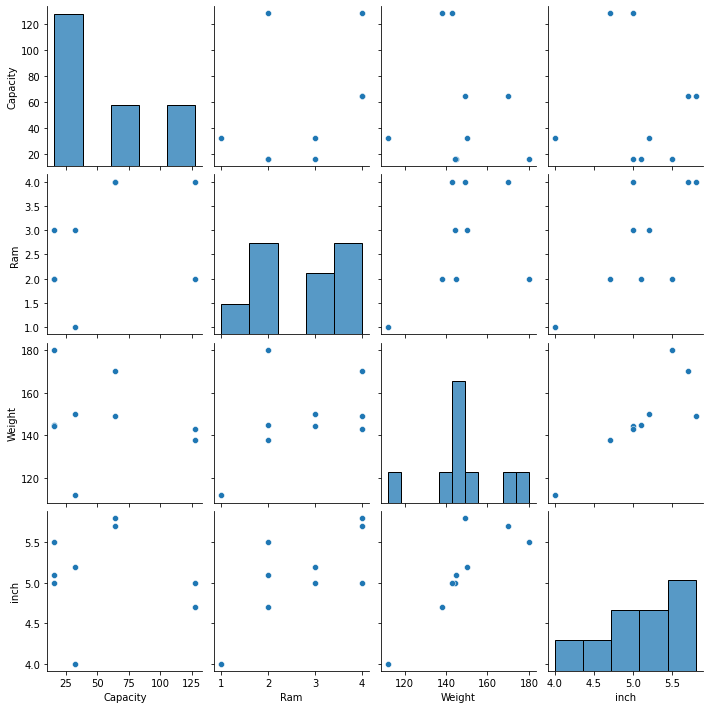

In [40]:
sb.pairplot(Smartphones)
plt.show()

In [41]:
from scipy.stats import pearsonr

In [46]:
pearson_coeff , p_value = pearsonr(Smartphones.inch , Smartphones.Weight)
pearson_coeff , p_value

(0.8457155883705422, 0.0040705879684336975)

In [49]:
num_var = Smartphones.drop(['Name' , 'OS' , 'Capacity' , 'Ram' , 'Company'] , axis = 1)
cor = num_var.corr()
cor

,Weight,inch
Weight,1.000000,0.845716
inch,0.845716,1.000000


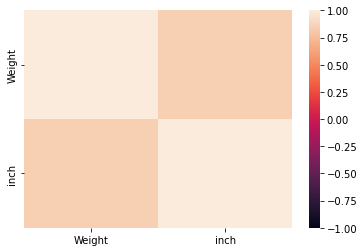

In [53]:
sb.heatmap(cor,xticklabels = cor.columns , yticklabels = cor.columns , vmin = -1 , vmax= +1)
plt.show()

In [58]:
num_var1 = Smartphones.drop(['Name' , 'OS' , 'Weight' , 'inch' , 'Company'] , axis = 1)
num_var1 

,Capacity,Ram
0,64,4
1,32,3
2,16,2
3,128,2
4,64,4
5,16,2
6,32,1
7,16,3
8,128,4


In [62]:
from scipy.stats import spearmanr
spearman_coeff , p_value = spearmanr(num_var1.Capacity ,num_var1.Ram)
spearman_coeff

0.4419819033287751